# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

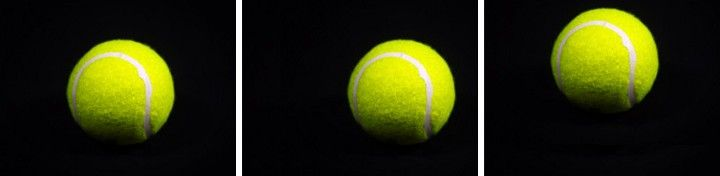



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Another functions that we can use with Keras are

*   Functions for repeating blocks: If we want to code up a big model, say something that’s 50 or even 100 layers deep, code can get very messy. When you have to define that many layers and on top of that all of the residual or dense connections you’ll have code all over the place!

*   Built-in Pre-Processing: Keras comes with several built-in models with pre-trained weights on ImageNet that you can use right out of the box. But, if you want to use those models directly, you’ll need to resize your images beforehand due to the fully connected layers at the end forcing the input size to be fixed.

*   Custom Layers: Similar to metrics and loss functions you might find yourself needing to create a custom layer if you want to use something outside of the standard convolutions, pooling, and activation functions. In such a situation you can follow the code example I’ve given below to implement it!

*   Custom Metrics and Loss Functions: Keras comes with a number of built in metrics and loss functions which are super useful for many cases. Somewhat unfortunately though, only the most common metrics and losses are built in.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [10]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

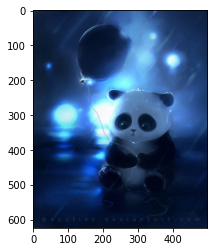

In [11]:
url = 'https://i.pinimg.com/originals/b4/0d/d9/b40dd96213eee7aa6512be6c9cc4f3a6.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


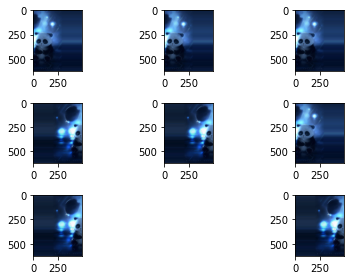

In [12]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or colums of pixels in the case of a vertical or horizontal flip, respectively. The increase  is specified by a Boolean **Vertical_flip** argyment for the **ImageDataGenerator** class.

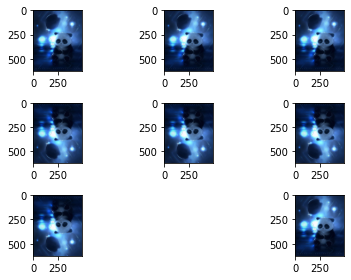

In [13]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is Sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Flotating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bround, upper bound] = [1 - zoom_range, 1 + zoom_range]

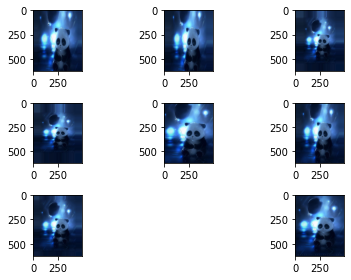

In [14]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is ramndomly rotate cockwise a specified number of degrees from 0 to 360. It is probable to rotate pixels out side of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

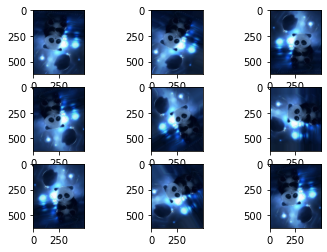

In [15]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techineques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of traning images and improve the precision of the job.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

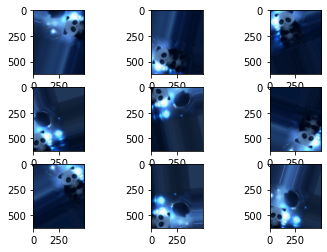

In [16]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we considere words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by it's synonym and even id¿f we do, we take the risk that the meaning of the sentence changes completely.
There are some libraries that we can help to carry out this task, we will begin by analysing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training , and data augmentation in NLP. We will focus only on data augmentation.


In [17]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 778kB 12.5MB/s 
     |████████████████████████████████| 686kB 19.8MB/s 
     |████████████████████████████████| 3.0MB 19.6MB/s 
     |████████████████████████████████| 102kB 8.8MB/s 
     |████████████████████████████████| 317kB 32.7MB/s 
     |████████████████████████████████| 1.7MB 36.2MB/s 
     |████████████████████████████████| 153kB 37.2MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 245kB 39.4MB/s 
     |████████████████████████████████| 235kB 48.0MB/s 
     |████████████████████████████████| 1.1MB 41.4MB/s 
     |████████████████████████████████| 204kB 42.3MB/s 
     |████████████████████████████████| 163kB 44.3MB/s 
     |████████████████████████████████| 122kB 42.1MB/s 
     |████████████████████████████████| 102kB 9.9MB/s 
     |████████████████████████████████| 102kB 8.6MB/s 


In [23]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [28]:
text = "Get up and walk forward, you've got the legs to do it"

TextAttack provides us with four methods for data aumentation




## WordNetAugmenter

Augments the text by replacing it with synonyms form the WordNet thesaurus (synonyms Diccionary).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus in that it groups words based on their meaning



In [30]:
aug = WordNetAugmenter();
aug.augment(text)

["Get up and walk forward, you've develop the legs to do it"]


## EmbeddingAugmenter
 Augment the text by transforming words with their inlays, with a constraint to ensure that their cosine simiarity is at least 0.8.
 
 

In [31]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:07<00:00, 67.1MB/s]
textattack: Unzipping file /root/.cache/textattack/tmppss2ao97.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


["Get up and walk forwards, you've got the legs to do it"]

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent character.



In [32]:
aug = CharSwapAugmenter()
aug.augment(text)

["Get up and walk fwrward, you've got the legs to do it"]


## EasyDataAugmenter
This augments the text with a combination of WordNet  synonym replacement, word deletion, word order changes and synonym insertion. All these 4 functionalities occur randomly. So we will get different results every time we run the code. this returns 4 augmented results, unlike the other methods.

In [33]:
aug = EasyDataAugmenter()
aug.augment(text)

["Get forward and walk up, you've got the legs to do it",
 "up and walk forward, you've got the legs to do it",
 "Get up IT and walk forward, you've got the legs to do it",
 "Get up and walk forward, you've got the pegleg to do it"]

Googletrans uses the Google translate Ajax API for language detection and translation.

The key parameters for the **translate ()** method are:

1. **src**: source language. This parameter is optional as googletrans will detect  it

2. **dest**: Target language. Obligatory parameter.

3. **text**: The text to be translated from the source language to the target language. Obligatory parameter.

When using this method what happends is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation,there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

the supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recomended to do some test with the language, if the target languages is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a trail and error problem.




Some examples of languages: 

* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ha'

* Latin 'la'

* Spanish 'es'

* Turkmen 'tk'

* Yiddish 'yi'

* Zulu 'zu'





In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 972kB 30.9MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
     |████████████████████████████████| 102kB 9.0MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=4fe4a6bba2ee240c21abe29373da082fb151bfbcf10580fcbd7a225ec764e7f9
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=404f5d7dec3af8c9d76b873b223687cddfd535232646100b0c1c382364618149
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
最初はうまくいかない場合は、もう一度やり直してください。
If it doesn't work at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.
